In [14]:
# import sys
# print(sys.executable)
# print(sys.version)

import os
os.environ['PROJ_LIB'] = '/home/jlee/.conda/envs/mmc_sgp/share/proj'

import wrf
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import xarray as xr
from numba import njit

# wrf_runs_dir = '/projects/mmc/jlee/sgp/wrf-mmc/wrf-runs/'
wrf_runs_dir = '/scratch/jlee/mmc/'
nb_dir = !pwd
data_dir_df = pd.read_csv(nb_dir[0]+'/data-dir-j3leswrf.csv', index_col=0)
# plots_dir = nb_dir[0]+'/plots_05a'

runs_list = list(data_dir_df.index)[:-1]

In [241]:
data_dir_df

,2018-08-05,2018-09-01
mynn,a1_0805m_30s,o1_0901m_30s
mynn_ck0.1,l7_0805m-ck,NaN
mynn_ml1,a3_0805m_30s_mixlen1,NaN
mynn_all4d-1arcs-topo,l5_0805m,NaN
mynn_d12-9s_d34-1s,a5_0805m_9s1s,o5_0901m_9s1s
mynn_d123-9s_d4-1s_lu,n2_d123-9s_d4-1s,NaN
mynn_all4d-9arcs_lu,n3_9s,NaN
mynn_d12-9s_d34-1s_ml1,a7_0805m_9s1s_mixlen1,o7_0901m_9s1s_mixlen1
mynn_d12-9s_d34-1s_ml0,a71_0805m_9s1s_mixlen0,NaN
mynn_d12-9s_d34-1s_ck0.1,a9_0805m_9s1s_ck01,NaN


## d02 wind direction at C1

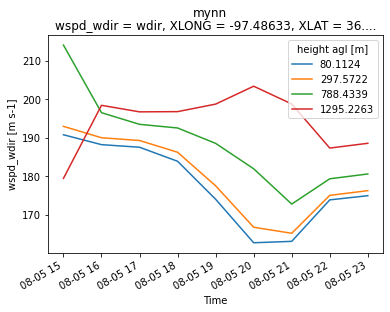

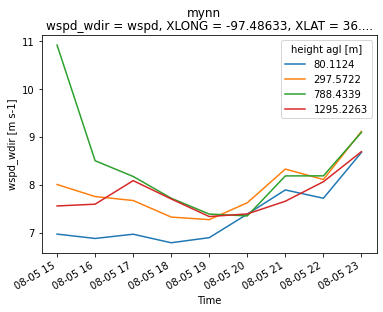

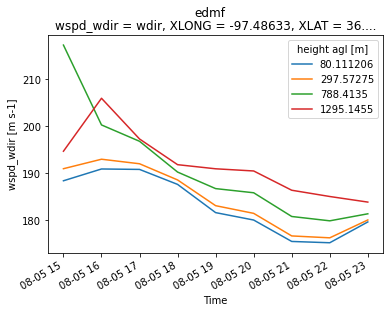

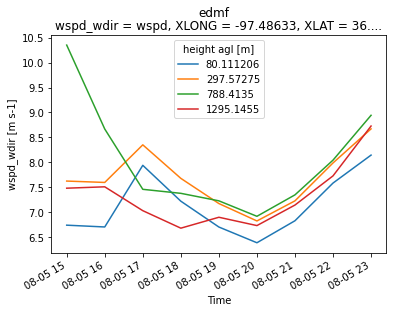

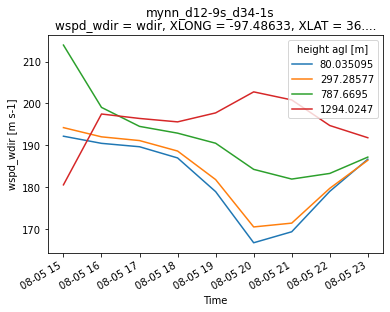

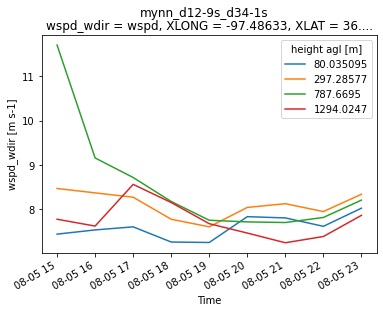

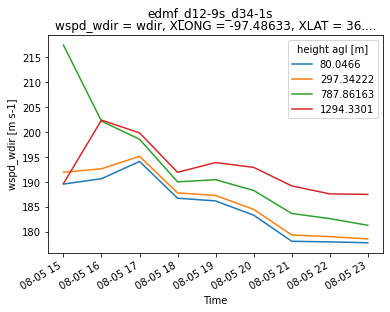

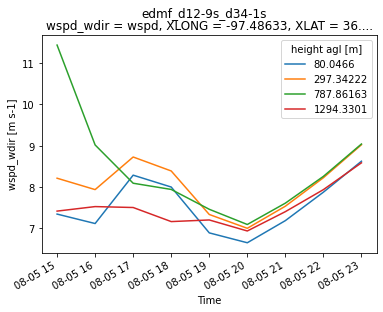

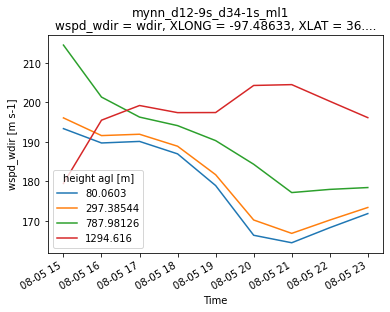

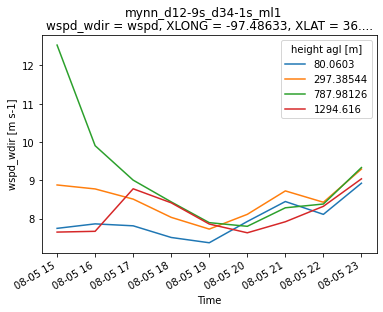

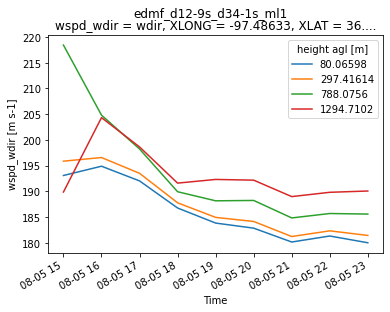

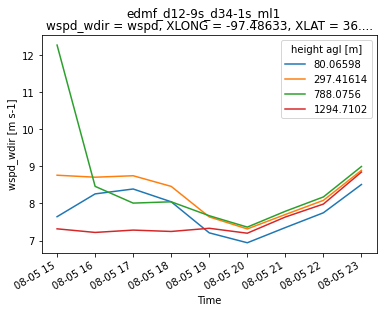

In [249]:
eval_date = '2018-08-05'

date_col = data_dir_df[eval_date]
    
auxout_dir = '/auxout/mmc_'

# run = 'mynn'

for run in ['mynn', 'edmf', 'mynn_d12-9s_d34-1s', 'edmf_d12-9s_d34-1s', 
            'mynn_d12-9s_d34-1s_ml1', 'edmf_d12-9s_d34-1s_ml1']:
# for run in ['mynn']:
    
    for hr in np.arange(15, 24, 1): 

        file = wrf_runs_dir+date_col[run]+auxout_dir+'d02_'+eval_date+'_'+str(hr)+':00:00'
    #     print(file)
        wrf_single = Dataset(file, 'r')
#         wd = wrf.getvar(wrf_single, 'wdir', timeidx=wrf.ALL_TIMES)[:, 124, 121]
#         ws = wrf.getvar(wrf_single, 'wspd', timeidx=wrf.ALL_TIMES)[:, 124, 121]
        wd = wrf.getvar(wrf_single, 'wdir', timeidx=0)[:, 124, 121]
        ws = wrf.getvar(wrf_single, 'wspd', timeidx=0)[:, 124, 121]

        try:
            wd_all = xr.concat([wd_all, wd], dim='Time')
            ws_all = xr.concat([ws_all, ws], dim='Time')
        except:
            wd_all = wd
            ws_all = ws

#     hgt = wrf.getvar(wrf_single, 'height_agl', timeidx=wrf.ALL_TIMES)[:, 124, 121]
    hgt = wrf.getvar(wrf_single, 'height_agl', timeidx=0)[:, 124, 121]

    for var_all in [wd_all, ws_all]:

#         print(var_all[:, 16])
        var_all[:, 16].plot(label=str(hgt[16].values))
        var_all[:, 40].plot(label=str(hgt[40].values))
        var_all[:, 56].plot(label=str(hgt[56].values))
        var_all[:, 64].plot(label=str(hgt[64].values))
        plt.legend(title='height agl [m]')
        plt.suptitle(run)
        plt.show()
        
    del(wd_all, ws_all)

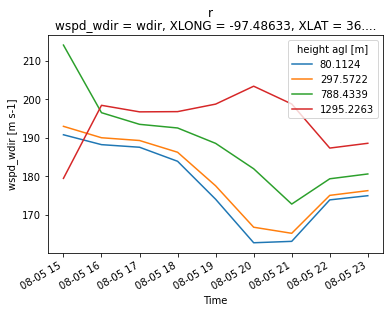

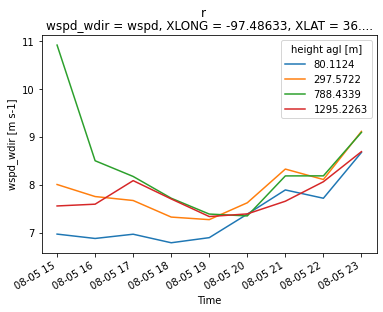

In [235]:
for var_all in [wd_all, ws_all]:

    var_all[:, 16].plot(label=str(hgt[16].values))
    var_all[:, 40].plot(label=str(hgt[40].values))
    var_all[:, 56].plot(label=str(hgt[56].values))
    var_all[:, 64].plot(label=str(hgt[64].values))
    plt.legend(title='height agl [m]')
    plt.suptitle(run)
    plt.show()

In [247]:
del(wd_all, ws_all)

NameError: name 'wd_all' is not defined

## locate C1 in d03

In [214]:
file = wrf_runs_dir+date_col['mynn']+auxout_dir+'d03_'+eval_date+'_'+str(hr)+':00:00'
wrf_single = Dataset(file, 'r')
lat = wrf.getvar(wrf_single, 'XLAT', timeidx=wrf.ALL_TIMES)
lon = wrf.getvar(wrf_single, 'XLONG', timeidx=wrf.ALL_TIMES)

# SGP C1 lat & lon: 
# 36.607322, -97.487643

In [230]:
lat[211, 112].values, lon[211, 112].values

(array(36.608482, dtype=float32), array(-97.48633, dtype=float32))

In [232]:
lat[200, 112]

<xarray.DataArray 'XLAT' ()>
array(36.588688, dtype=float32)
Coordinates:
    XLONG    float32 -97.49
    XLAT     float32 36.59
    Time     datetime64[ns] 2018-08-05T23:00:00
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATITUDE, SOUTH IS NEGATIVE
    units:        degree_north
    stagger:      
    coordinates:  XLONG XLAT
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

## d02 edmf activation at d02-d03 edge

In [259]:
eval_date = '2018-08-05'

def gen_edmf_act_csv(eval_date, run):
    
    edmf_var = 'EDMF_W'
    hgt_i = 16

    date_col = data_dir_df[eval_date]

    auxout_dir = '/auxout/original_run/mmc_'

    edmf_time, edmf_pct = [], []

    for hr in np.arange(12, 24, 1): 
    # for hr in np.arange(12, 14, 1):
    # hr = 19

        file = wrf_runs_dir+date_col[run]+auxout_dir+'d02_'+eval_date+'_'+str(hr)+':00:00'
        print(file)
        wrf_single = Dataset(file, 'r')

        # d03 southern edge grid cells in d02
        # d02 [110, 113:128] is 36.21, -97.75 to -97.25
        # d02 [109, ] is 36.24
        # d03 southern edge is 36.23, -97.74 to -97.27
        var_edmf = wrf.getvar(wrf_single, edmf_var, timeidx=wrf.ALL_TIMES)[:, :, 109:111, 113:128]
        var_edmf_dims = var_edmf[0, 0, :, :].shape
        total_d02_cells = var_edmf_dims[0]*var_edmf_dims[1]

        for t in np.arange(0, 6): 
        # #         for t in np.arange(0, 1): 

            edmf_at_d03_pct = 100*(var_edmf[t, hgt_i, :, :] != 0).sum().values/total_d02_cells
    #         print(edmf_at_d03_pct)

            edmf_pct.append(edmf_at_d03_pct)
            edmf_time.append(var_edmf['Time'][t].values)

    pd.DataFrame(data=zip(edmf_time, edmf_pct), 
                 columns=['time', 'activation_pct']).to_csv(nb_dir[0]+'/edmf_act_csv/'+eval_date+'_'+run+'.csv')

In [258]:
eval_date = '2018-08-05'

for run in ['edmf', 'edmf_d12-9s_d34-1s', 'edmf_d12-9s_d34-1s_ml1']:

    gen_edmf_act_csv(eval_date, run)

/scratch/jlee/mmc/a2_0805e_30s/auxout/original_run/mmc_d02_2018-08-05_12:00:00
/scratch/jlee/mmc/a2_0805e_30s/auxout/original_run/mmc_d02_2018-08-05_13:00:00
/scratch/jlee/mmc/a2_0805e_30s/auxout/original_run/mmc_d02_2018-08-05_14:00:00
/scratch/jlee/mmc/a2_0805e_30s/auxout/original_run/mmc_d02_2018-08-05_15:00:00
/scratch/jlee/mmc/a2_0805e_30s/auxout/original_run/mmc_d02_2018-08-05_16:00:00
/scratch/jlee/mmc/a2_0805e_30s/auxout/original_run/mmc_d02_2018-08-05_17:00:00
/scratch/jlee/mmc/a2_0805e_30s/auxout/original_run/mmc_d02_2018-08-05_18:00:00
/scratch/jlee/mmc/a2_0805e_30s/auxout/original_run/mmc_d02_2018-08-05_19:00:00
/scratch/jlee/mmc/a2_0805e_30s/auxout/original_run/mmc_d02_2018-08-05_20:00:00
/scratch/jlee/mmc/a2_0805e_30s/auxout/original_run/mmc_d02_2018-08-05_21:00:00
/scratch/jlee/mmc/a2_0805e_30s/auxout/original_run/mmc_d02_2018-08-05_22:00:00
/scratch/jlee/mmc/a2_0805e_30s/auxout/original_run/mmc_d02_2018-08-05_23:00:00
/scratch/jlee/mmc/a6_0805e_9s1s/auxout/original_run/

In [260]:
eval_date = '2018-09-01'

for run in ['edmf', 'edmf_d12-9s_d34-1s']:

    gen_edmf_act_csv(eval_date, run)

/scratch/jlee/mmc/o2_0901e_30s/auxout/original_run/mmc_d02_2018-09-01_12:00:00
/scratch/jlee/mmc/o2_0901e_30s/auxout/original_run/mmc_d02_2018-09-01_13:00:00
/scratch/jlee/mmc/o2_0901e_30s/auxout/original_run/mmc_d02_2018-09-01_14:00:00
/scratch/jlee/mmc/o2_0901e_30s/auxout/original_run/mmc_d02_2018-09-01_15:00:00
/scratch/jlee/mmc/o2_0901e_30s/auxout/original_run/mmc_d02_2018-09-01_16:00:00
/scratch/jlee/mmc/o2_0901e_30s/auxout/original_run/mmc_d02_2018-09-01_17:00:00
/scratch/jlee/mmc/o2_0901e_30s/auxout/original_run/mmc_d02_2018-09-01_18:00:00
/scratch/jlee/mmc/o2_0901e_30s/auxout/original_run/mmc_d02_2018-09-01_19:00:00
/scratch/jlee/mmc/o2_0901e_30s/auxout/original_run/mmc_d02_2018-09-01_20:00:00
/scratch/jlee/mmc/o2_0901e_30s/auxout/original_run/mmc_d02_2018-09-01_21:00:00
/scratch/jlee/mmc/o2_0901e_30s/auxout/original_run/mmc_d02_2018-09-01_22:00:00
/scratch/jlee/mmc/o2_0901e_30s/auxout/original_run/mmc_d02_2018-09-01_23:00:00
/scratch/jlee/mmc/o6_0901e_9s1s/auxout/original_run/

In [173]:
edmf_pct

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [182]:
edmf_time

[numpy.datetime64('2018-08-05T12:00:00.000000000'),
 numpy.datetime64('2018-08-05T12:10:00.000000000'),
 numpy.datetime64('2018-08-05T12:20:00.000000000'),
 numpy.datetime64('2018-08-05T12:30:00.000000000'),
 numpy.datetime64('2018-08-05T12:40:00.000000000'),
 numpy.datetime64('2018-08-05T12:50:00.000000000'),
 numpy.datetime64('2018-08-05T13:00:00.000000000'),
 numpy.datetime64('2018-08-05T13:10:00.000000000'),
 numpy.datetime64('2018-08-05T13:20:00.000000000'),
 numpy.datetime64('2018-08-05T13:30:00.000000000'),
 numpy.datetime64('2018-08-05T13:40:00.000000000'),
 numpy.datetime64('2018-08-05T13:50:00.000000000')]

In [189]:
pd.DataFrame(data=zip(edmf_time, edmf_pct), columns=['time', 'activation_pct'])

,time,activation_pct
0,2018-08-05 12:00:00,0.0
1,2018-08-05 12:10:00,0.0
2,2018-08-05 12:20:00,0.0
3,2018-08-05 12:30:00,0.0
4,2018-08-05 12:40:00,0.0
...,...,...
67,2018-08-05 23:10:00,0.0
68,2018-08-05 23:20:00,0.0
69,2018-08-05 23:30:00,0.0
70,2018-08-05 23:40:00,0.0


In [178]:
var_edmf['Time']

<xarray.DataArray 'Time' (Time: 6)>
array(['2018-08-05T13:00:00.000000000', '2018-08-05T13:10:00.000000000',
       '2018-08-05T13:20:00.000000000', '2018-08-05T13:30:00.000000000',
       '2018-08-05T13:40:00.000000000', '2018-08-05T13:50:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    XTIME    (Time) float32 1.5e+03 1.51e+03 1.52e+03 1.53e+03 1.54e+03 1.55e+03
  * Time     (Time) datetime64[ns] 2018-08-05T13:00:00 ... 2018-08-05T13:50:00

In [133]:
var_edmf[0, 0, :, :].shape

(2, 15)

In [109]:
len(var_edmf[0, 0])

15

In [98]:
var_edmfa = wrf.getvar(wrf_single, 'EDMF_A', timeidx=wrf.ALL_TIMES)[:, :, 110, 113:128]

In [111]:
(var_edmf[0, hgt_i, :] != 0).sum().values/

array(15)

In [101]:
lat[111, 113]

<xarray.DataArray 'XLAT' ()>
array(36.2412, dtype=float32)
Coordinates:
    XLONG    float32 -97.75
    XLAT     float32 36.24
    Time     datetime64[ns] 2018-08-05T17:00:00
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATITUDE, SOUTH IS NEGATIVE
    units:        degree_north
    stagger:      
    coordinates:  XLONG XLAT
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

In [83]:
lat[110, 128]

<xarray.DataArray 'XLAT' ()>
array(36.214283, dtype=float32)
Coordinates:
    XLONG    float32 -97.25
    XLAT     float32 36.21
    Time     datetime64[ns] 2018-08-05T17:00:00
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATITUDE, SOUTH IS NEGATIVE
    units:        degree_north
    stagger:      
    coordinates:  XLONG XLAT
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

In [50]:
lon[0, 0]

<xarray.DataArray 'XLONG' ()>
array(-97.736084, dtype=float32)
Coordinates:
    XLONG    float32 -97.74
    XLAT     float32 36.23
    Time     datetime64[ns] 2018-08-05T17:00:00
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LONGITUDE, WEST IS NEGATIVE
    units:        degree_east
    stagger:      
    coordinates:  XLONG XLAT
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

In [59]:
lat[0, -1]

<xarray.DataArray 'XLAT' ()>
array(36.228714, dtype=float32)
Coordinates:
    XLONG    float32 -97.27
    XLAT     float32 36.23
    Time     datetime64[ns] 2018-08-05T17:00:00
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATITUDE, SOUTH IS NEGATIVE
    units:        degree_north
    stagger:      
    coordinates:  XLONG XLAT
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

In [55]:
lat[-1, -1]

<xarray.DataArray 'XLAT' ()>
array(36.766586, dtype=float32)
Coordinates:
    XLONG    float32 -97.27
    XLAT     float32 36.77
    Time     datetime64[ns] 2018-08-05T17:00:00
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATITUDE, SOUTH IS NEGATIVE
    units:        degree_north
    stagger:      
    coordinates:  XLONG XLAT
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

In [6]:
var[:, 123, 121]

<xarray.DataArray 'wspd_wdir' (bottom_top: 108)>
array([187.3293   , 187.38087  , 187.42686  , 187.47008  , 187.50473  ,
       187.54515  , 187.57611  , 187.59508  , 187.62643  , 187.66765  ,
       187.68613  , 187.71072  , 187.74008  , 187.76508  , 187.769    ,
       187.83025  , 187.83818  , 187.85995  , 187.91656  , 187.9398   ,
       187.96274  , 188.00568  , 188.02304  , 188.07098  , 188.09692  ,
       188.1542   , 188.20937  , 188.25356  , 188.31961  , 188.36554  ,
       188.44853  , 188.52364  , 188.60136  , 188.68484  , 188.78262  ,
       188.88704  , 188.99878  , 189.12015  , 189.25081  , 189.39232  ,
       189.5361   , 189.7021   , 189.87836  , 190.06635  , 190.27026  ,
       190.48518  , 190.71928  , 190.96664  , 191.22612  , 191.50616  ,
       191.79678  , 192.0998   , 192.41353  , 192.72575  , 193.03468  ,
       193.31873  , 193.59674  , 193.91022  , 194.27621  , 194.72446  ,
       195.17534  , 195.61191  , 196.02293  , 196.54404  , 196.91237  ,
       197.06834  , 196.95691  , 192.34567  , 180.40198  , 171.14998  ,
       168.41182  , 174.51021  , 182.68849  , 180.4771   , 174.99796  ,
       174.07733  , 171.52399  , 174.26746  , 185.80629  , 194.20218  ,
       207.99698  , 217.95798  , 228.00443  , 190.06277  ,  70.50658  ,
        57.4407   ,  46.520943 ,  47.512913 ,  53.778652 ,  51.684498 ,
        41.6055   ,  32.742996 ,   3.2258735, 330.32983  , 328.63678  ,
       331.09412  , 339.63312  , 340.69058  , 344.3156   , 347.37943  ,
       345.02515  , 343.4923   , 338.89294  , 327.65732  , 318.7529   ,
       246.67651  , 263.1055   , 332.33276  ], dtype=float32)
Coordinates:
    wspd_wdir  <U4 'wdir'
    XLONG      float32 -97.49
    XLAT       float32 36.57
    XTIME      float32 1.74e+03
    Time       datetime64[ns] 2018-08-05T17:00:00
Dimensions without coordinates: bottom_top
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  wdir in projection space
    units:        m s-1
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

In [13]:
var[:, 124, 121]

<xarray.DataArray 'wspd_wdir' (bottom_top: 108)>
array([186.80392  , 186.92415  , 187.0106   , 187.06703  , 187.11905  ,
       187.15929  , 187.18929  , 187.22609  , 187.26929  , 187.2967   ,
       187.30754  , 187.34708  , 187.37044  , 187.4134   , 187.42699  ,
       187.45763  , 187.49411  , 187.51732  , 187.52849  , 187.58807  ,
       187.60966  , 187.64777  , 187.67723  , 187.69554  , 187.77551  ,
       187.8082   , 187.8605   , 187.91714  , 187.99141  , 188.03108  ,
       188.1198   , 188.194    , 188.27531  , 188.37596  , 188.45895  ,
       188.57321  , 188.68488  , 188.80865  , 188.94652  , 189.08385  ,
       189.24579  , 189.40826  , 189.59116  , 189.78882  , 189.99557  ,
       190.21729  , 190.45595  , 190.71518  , 190.98657  , 191.27112  ,
       191.57796  , 191.8937   , 192.2198   , 192.54785  , 192.87144  ,
       193.17003  , 193.4509   , 193.76886  , 194.13377  , 194.5805   ,
       195.0316   , 195.4636   , 195.8571   , 196.33397  , 196.69434  ,
       196.84589  , 196.7556   , 191.97008  , 180.27666  , 171.71059  ,
       170.02554  , 178.54759  , 186.29872  , 181.51407  , 174.30688  ,
       173.25194  , 171.21779  , 173.42288  , 184.70271  , 194.11313  ,
       208.27797  , 217.7944   , 225.88646  , 171.0702   ,  68.335396 ,
        55.412052 ,  46.58387  ,  48.965584 ,  54.412323 ,  51.25244  ,
        41.181343 ,  31.907827 ,   0.3806268, 328.52914  , 327.2988   ,
       330.58197  , 339.152    , 340.25574  , 344.0465   , 347.0273   ,
       344.69357  , 343.21182  , 338.55624  , 327.4295   , 318.41367  ,
       248.5762   , 262.76733  , 329.68106  ], dtype=float32)
Coordinates:
    wspd_wdir  <U4 'wdir'
    XLONG      float32 -97.49
    XLAT       float32 36.59
    XTIME      float32 1.74e+03
    Time       datetime64[ns] 2018-08-05T17:00:00
Dimensions without coordinates: bottom_top
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  wdir in projection space
    units:        m s-1
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...